In [56]:
!pip3 install spotipy

You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.8/bin/python3.8 -m pip install --upgrade pip' command.


In [64]:
import json
import spotipy
import pandas as pd
import matplotlib.pyplot as plt
from spotipy.oauth2 import SpotifyClientCredentials

client_id = '' #insert your client id
client_secret = '' # insert your client secret id here

client_credentials_manager = SpotifyClientCredentials(client_id, client_secret)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

playlist_id='6Lt5r7BdOM87jphRlYA1zv' #insert your playlist id
results = sp.playlist(playlist_id)

#https://open.spotify.com/playlist/6Lt5r7BdOM87jphRlYA1zv?si=165837f1ec6c4a2a
# <iframe src="https://open.spotify.com/embed/playlist/6Lt5r7BdOM87jphRlYA1zv" 

SpotifyOauthError: No client_id. Pass it or set a SPOTIPY_CLIENT_ID environment variable.

In [58]:
# create a list of song ids
ids=[]

for item in results['tracks']['items']:
        track = item['track']['id']
        ids.append(track)
        
song_meta={'id':[],'album':[], 'name':[], 
           'artist':[],'explicit':[],'popularity':[]}

for song_id in ids:
    # get song's meta data
    meta = sp.track(song_id)
    
    # song id
    song_meta['id'].append(song_id)

    # album name
    album=meta['album']['name']
    song_meta['album']+=[album]

    # song name
    song=meta['name']
    song_meta['name']+=[song]
    
    # artists name
    s = ', '
    artist=s.join([singer_name['name'] for singer_name in meta['artists']])
    song_meta['artist']+=[artist]
    
    # explicit: lyrics could be considered offensive or unsuitable for children
    explicit=meta['explicit']
    song_meta['explicit'].append(explicit)
    
    # song popularity
    popularity=meta['popularity']
    song_meta['popularity'].append(popularity)

song_meta_df=pd.DataFrame.from_dict(song_meta)

# check the song feature
features = sp.audio_features(song_meta['id'])
# change dictionary to dataframe
features_df=pd.DataFrame.from_dict(features)

# convert milliseconds to mins
# duration_ms: The duration of the track in milliseconds.
# 1 minute = 60 seconds = 60 × 1000 milliseconds = 60,000 ms
features_df['duration_ms']=features_df['duration_ms']/60000

# combine two dataframe
final_df=song_meta_df.merge(features_df)

In [59]:
final_df.head()

,id,album,name,artist,explicit,popularity,danceability,energy,key,loudness,...,instrumentalness,liveness,valence,tempo,type,uri,track_href,analysis_url,duration_ms,time_signature
0,429EttO8gs0bDo2SQfUNSm,Dream Your Life Away (Special Edition),Georgia,Vance Joy,False,67,0.388,0.660,11,-7.372,...,0.000307,0.0943,0.401,143.554,audio_features,spotify:track:429EttO8gs0bDo2SQfUNSm,https://api.spotify.com/v1/tracks/429EttO8gs0b...,https://api.spotify.com/v1/audio-analysis/429E...,3.841783,4
1,29jtZGdgpE2lWm2mkIt6HS,Dream Your Life Away (Special Edition),Mess Is Mine,Vance Joy,False,68,0.595,0.723,7,-8.256,...,0.028600,0.0995,0.272,108.043,audio_features,spotify:track:29jtZGdgpE2lWm2mkIt6HS,https://api.spotify.com/v1/tracks/29jtZGdgpE2l...,https://api.spotify.com/v1/audio-analysis/29jt...,3.727333,1
2,6liNJDyWJjyHAgDnAX95bw,Dream Your Life Away (Special Edition),Fire and the Flood,Vance Joy,False,67,0.596,0.827,5,-4.402,...,0.000000,0.0958,0.329,115.034,audio_features,spotify:track:6liNJDyWJjyHAgDnAX95bw,https://api.spotify.com/v1/tracks/6liNJDyWJjyH...,https://api.spotify.com/v1/audio-analysis/6liN...,4.156367,4
3,20svOpmCQao5GUBgSu8zDe,The Head and the Heart,Rivers and Roads,The Head And The Heart,False,1,0.499,0.178,0,-9.764,...,0.000037,0.0762,0.184,131.993,audio_features,spotify:track:20svOpmCQao5GUBgSu8zDe,https://api.spotify.com/v1/tracks/20svOpmCQao5...,https://api.spotify.com/v1/audio-analysis/20sv...,4.733333,3
4,1X3T2J7S1s6aCIbmjFf2NG,The Shepherd's Dog,"Flightless Bird, American Mouth",Iron & Wine,False,8,0.370,0.403,3,-7.997,...,0.064900,0.1060,0.179,155.049,audio_features,spotify:track:1X3T2J7S1s6aCIbmjFf2NG,https://api.spotify.com/v1/tracks/1X3T2J7S1s6a...,https://api.spotify.com/v1/audio-analysis/1X3T...,4.031950,3


In [63]:
features_df.columns

Index(['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'type', 'id', 'uri', 'track_href', 'analysis_url', 'duration_ms',
       'time_signature'],
      dtype='object')

In [60]:
music_feature = features_df[["danceability","energy","loudness",
                            "speechiness","acousticness","instrumentalness","energy"]]

In [61]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()
music_feature.loc[:]=min_max_scaler.fit_transform(music_feature.loc[:])

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/pandas/core/indexing.py:723: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)


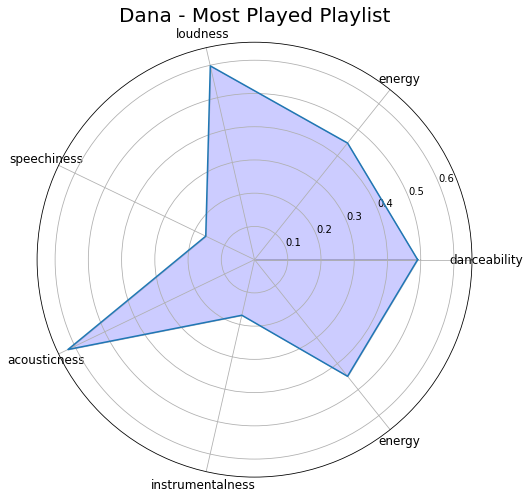

In [62]:
import math

# plot size
fig=plt.figure(figsize=(12,8))

# convert column names into a list
categories=list(music_feature.columns)
# number of categories
N=len(categories)

# create a list with the average of all features
value=list(music_feature.mean())

# repeat first value to close the circle
# the plot is a circle, so we need to "complete the loop"
# and append the start value to the end.
value+=value[:1]
# calculate angle for each category
angles=[n/float(N)*2*math.pi for n in range(N)]
angles+=angles[:1]

# plot

plt.polar(angles, value)
plt.fill_between(angles,value,alpha=0.2, facecolor= "blue", edgecolor=(0,0,0,.5))

plt.title('Dana - Most Played Playlist', size=20)

plt.xticks(angles[:-1],categories, size=12)
# plt.yticks(color='grey',size=15)
plt.show()